In [25]:
# coding: utf-8

# ## import some stuff ##

# In[246]:

import numpy as np
import scipy as sc
from pandas import Series,DataFrame
import pandas as pd

from scipy import spatial
from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
mpl.rcParams['figure.figsize'] = (12.0, 6.0)

In [26]:
def plot_matrix(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix, interpolation='nearest')
    fig.colorbar(cax)

In [27]:
df = pd.read_csv('/home/xxx/MScBI/S2/Innovation/project/uberlibrary/matrixOut.txt', header=None)

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,403,404,405,406,407,408,409,410,411,412
0,1112735,0,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
1,1112650,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,304163,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,304162,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,304161,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df2 = df.set_index(0)
df2

,1,2,3,4,5,6,7,8,9,10,...,403,404,405,406,407,408,409,410,411,412
0,,,,,,,,,,,,,,,,,,,,,
1112735,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1112650,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
304163,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
304162,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304167,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304166,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304165,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
len(df2)

50

412 50


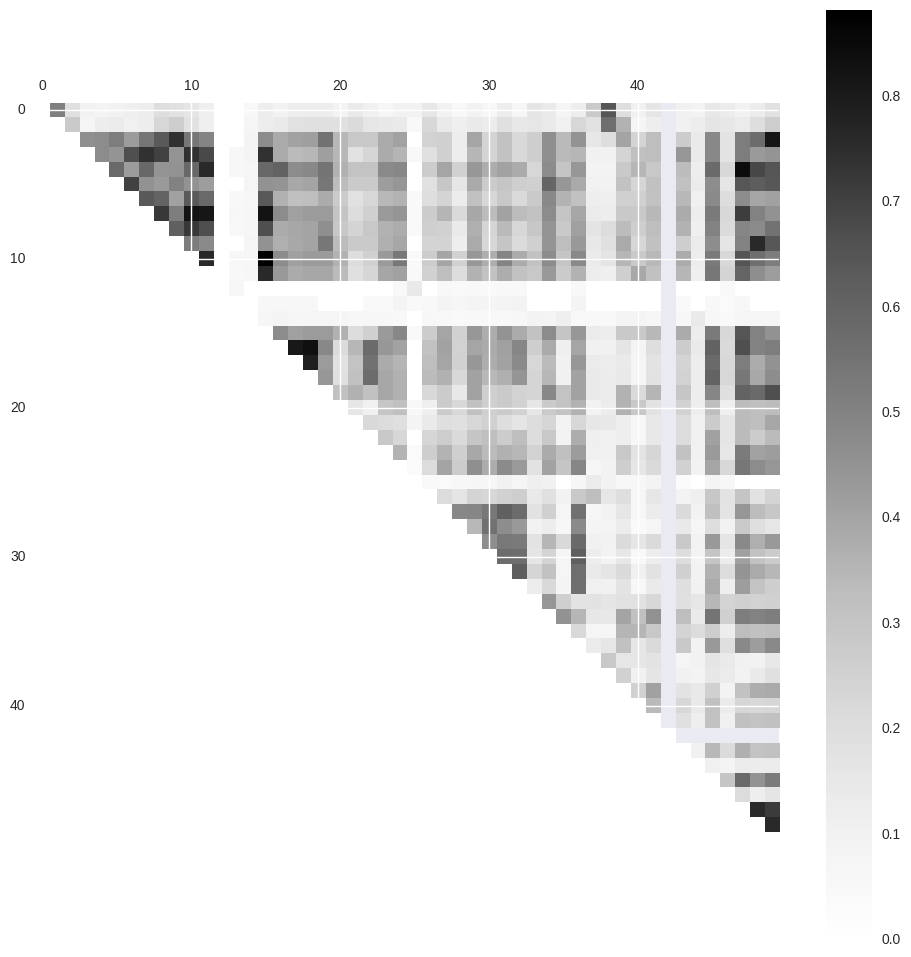

In [65]:

transaction_df = df2.transpose()
# take data matrix from dataframe
transaction_matrix = transaction_df.as_matrix()

# get number of rows and columns
rows, columns = transaction_matrix.shape
print rows,columns

# init new matrix
frequent_items_matrix = np.zeros((50,50))
# compare every product with every other
for this_column in range(0, columns-1):
    for next_column in range(this_column + 1, columns):
        # multiply product pair vectors
        #product_vector = transaction_matrix[:,this_column] * transaction_matrix[:,next_column]
        product_vector = 1 - spatial.distance.cosine(transaction_matrix[:,this_column], transaction_matrix[:,next_column])
        # check the number of pair occurrences in baskets
        count_matches = product_vector#sum((product_vector)>0)
        # save values to new matrix
        frequent_items_matrix[this_column,next_column] = count_matches
 
#print frequent_items_matrix
plot_matrix(frequent_items_matrix)

In [66]:
frequent_items_matrix

array([[ 0.        ,  0.50709255,  0.18752289, ...,  0.09035079,
         0.13093073,  0.18070158],
       [ 0.        ,  0.        ,  0.2773501 , ...,  0.13363062,
         0.19364917,  0.26726124],
       [ 0.        ,  0.        ,  0.        , ...,  0.51887452,
         0.5728919 ,  0.81537425],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.75907212,  0.71428571],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.75907212],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

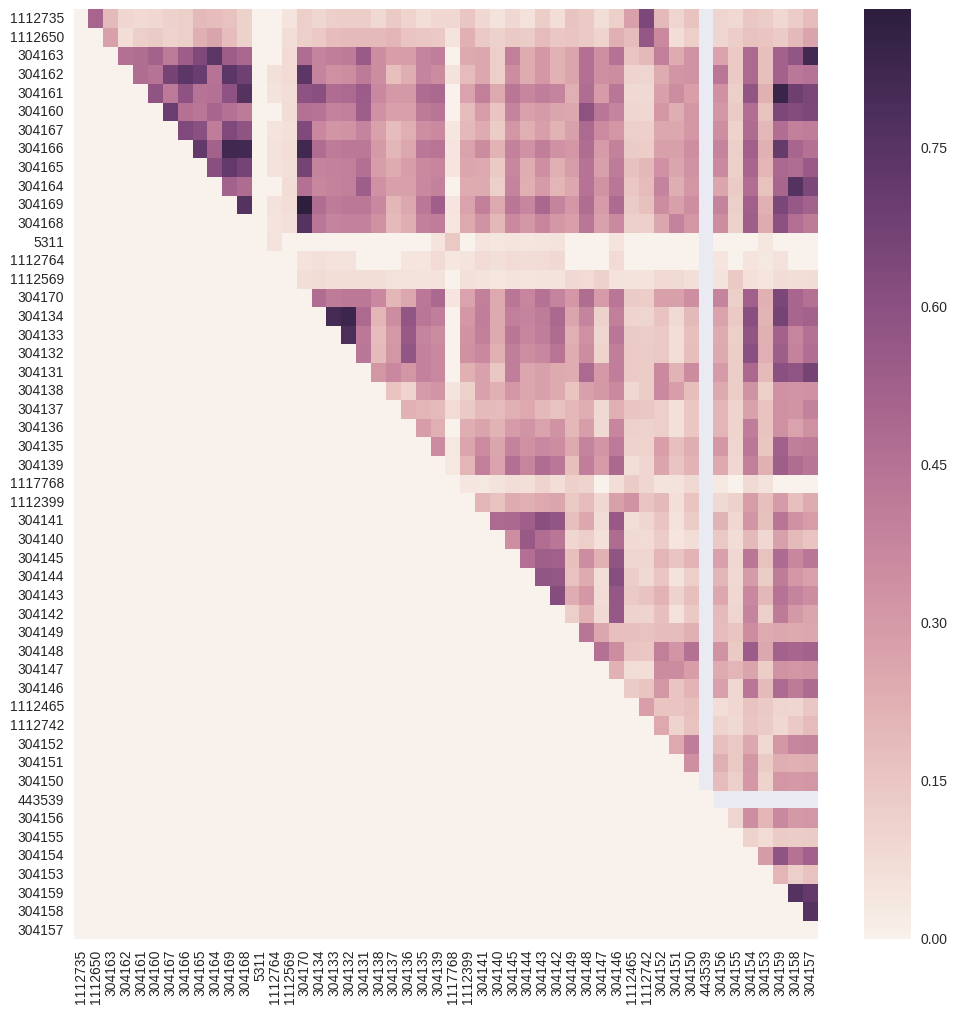

In [67]:
# and finally combine product names with data
frequent_items_df = pd.DataFrame(frequent_items_matrix, columns = transaction_df.columns.values, index = transaction_df.columns.values)
 
import seaborn as sns
mpl.rcParams['figure.figsize'] = (12.0, 12.0)
# and plot
sns.heatmap(frequent_items_df)

In [68]:
frequent_items_df.head()

,1112735,1112650,304163,304162,304161,304160,304167,304166,304165,304164,...,304151,304150,443539,304156,304155,304154,304153,304159,304158,304157
1112735,0.0,0.507093,0.187523,0.093761,0.081992,0.090351,0.110657,0.122988,0.193892,0.180702,...,0.097590,0.159364,NaN,0.099449,0.084515,0.147542,0.128885,0.090351,0.130931,0.180702
1112650,0.0,0.000000,0.277350,0.069338,0.121268,0.133631,0.109109,0.121268,0.229416,0.267261,...,0.072169,0.117851,NaN,0.098058,0.125000,0.163663,0.152499,0.133631,0.193649,0.267261
304163,0.0,0.000000,0.000000,0.461538,0.470871,0.518875,0.423659,0.538138,0.636285,0.741249,...,0.240192,0.326860,NaN,0.271964,0.138675,0.484182,0.169182,0.518875,0.572892,0.815374
304162,0.0,0.000000,0.000000,0.000000,0.470871,0.444750,0.665750,0.739940,0.699913,0.444750,...,0.320256,0.326860,NaN,0.435143,0.138675,0.484182,0.169182,0.518875,0.429669,0.444750
304161,0.0,0.000000,0.000000,0.000000,0.000000,0.583383,0.423405,0.588235,0.445132,0.453743,...,0.350070,0.285831,NaN,0.332956,0.121268,0.582182,0.221918,0.842665,0.688847,0.648204


In [69]:
frequent_items_df[304165][frequent_items_df[304165] > 0.8]

Series([], Name: 304165, dtype: float64)

In [76]:
def get_recommendation(book_id, similarity_treshold):
    return frequent_items_df[book_id][frequent_items_df[book_id] > similarity_treshold].to_json()

get_recommendation(304162, 6/10)


'{"1112735":0.0937614462,"1112650":0.0693375245,"304163":0.4615384615}'

In [77]:
print 6/10

0
